In [75]:
setwd('/import/DB/fel/BJTC-204')

In [19]:
library(dplyr)

In [15]:
load('/import/mdd.rna/GSE80655.rda')
ls()
head(expr3,2)
dim(expr3)
library(dplyr)
cliinfo = cliinfo %>%  filter(V4 == 'M')
dim(cliinfo)
head(cliinfo,2)

[1] "NMF.Exp.rank4" "cliinfo"       "count"         "estim.coad"   
 [5] "expr3"         "group"         "index"         "jco"          
 [9] "nmf.rank4"     "nmfinput"      "prot"          "ranks"        
[13] "seed"          "sig.order"

,SYMBOL,SL32230,SL32231,SL32242,SL32243,SL32244,SL32245,SL32246,SL32247,SL32248,...,SL7403,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,TSPAN6,76,130,104,147,123,129,150,165,104,...,203,241,301,416,238,198,72,216,335,105
2,TNMD,3,2,3,2,0,4,4,5,3,...,5,5,8,1,4,5,1,3,9,4


[1] 34036    48

[1] 38  6

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,SL32231,46,MD,M,X3064,DLPFC
2,SL32242,32,Control,M,X3186,DLPFC


In [16]:
library(dplyr)
count =expr3 %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'SYMBOL')

In [17]:
cliinfo = cliinfo %>% dplyr::filter(V3 == 'MD')

In [18]:
count.raw = count

In [19]:
count = count[,cliinfo$V1]

In [20]:
prot = c('H4C3','PRSS3','TUSC3')
count = count[unique(prot),]

In [21]:
count = log2(edgeR::cpm(count) +1)

In [22]:
nmfinput = count %>%  as.matrix()

In [23]:
library(NMF)

In [24]:
library(ConsensusClusterPlus)

In [58]:
# library(NMF) 

# con <- ConsensusClusterPlus(nmfinput, #矩阵形式
#                             maxK=10, #最大聚类簇数量
#                             reps=100, #抽取的子样本数量
#                             pItem=0.8,#抽样样本的比例 
#                             pFeature=1,
#                             title="resultstrain3", #输出文件夹名字
#                             clusterAlg="km", #选择聚类算法
#                             distance="euclidean", #指定聚类时使用的距离或相关性类型
#                             seed=1234, #中子数
#                             plot="png", #输出格式 （pdf可能会比较难打开）
#                             writeTable=TRUE)

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`)."


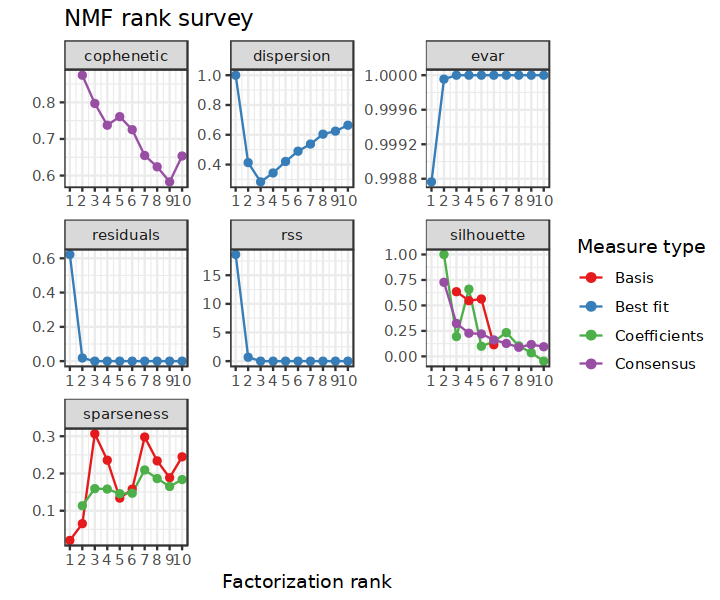

In [72]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

plot(estim.coad)

seed = 2020
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

In [76]:
pdf('./figure/testset1.nmf.fig1.pdf',width = 11,height = 9)
plot(estim.coad)
dev.off()

Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`)."


png 
  2

In [ ]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)


In [82]:
pdf('./figure/testset1.nmf.fig2.heat.pdf',width = 7,height = 6)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))  # ,"3"=jco[3]
dev.off()

png 
  2

In [32]:
library(tinyarray)

In [33]:
group

SL32231 SL32245 SL32247 SL32248  SL5997  SL5998  SL6341  SL6612  SL6645  SL6666 
      1       1       1       1       1       2       2       2       1       2 
 SL6668  SL7154  SL7155  SL7384  SL7698  SL7801  SL7806 
      2       2       2       2       2       2       2 
attr(,"what")
[1] columns
Levels: 1 2

In [41]:
count.raw = count.raw[,cliinfo$V1]

In [42]:
a =  count.raw^2 -1

In [51]:
cg=names(tail(sort(apply(a,1,sd)),100))
n=a[cg,]

In [84]:
pdf('./figure/testset1.nmf.fig3.pca.pdf',width = 5.5,height = 4)
draw_pca(n,group)
dev.off()

png 
  2

In [53]:
group

SL32231 SL32245 SL32247 SL32248  SL5997  SL5998  SL6341  SL6612  SL6645  SL6666 
      1       1       1       1       1       2       2       2       1       2 
 SL6668  SL7154  SL7155  SL7384  SL7698  SL7801  SL7806 
      2       2       2       2       2       2       2 
attr(,"what")
[1] columns
Levels: 1 2

In [85]:
pdf('./figure/testset1.nmf.fig4.heat2.pdf',width = 4,height = 4)
basismap(nmf.rank4,
         cexCol = 1.5,
         cexRow = 1,
         annColors=list(c("#2874C5","#EABF00","#C6524A","#868686")))
dev.off()

png 
  2

In [55]:
options(repr.plot.width = 6,repr.plot.height = 5)

In [117]:
dp = nmfinput[,order(group)]

In [119]:
p = draw_heatmap(dp,sort(group),
             color_an = c("#2874C5","#C6524A","#868686"),
             annotation_legend = T,
             cluster_cols = F,
             show_rownames = T)


In [120]:

pdf('./figure/testset1.nmf.fig4.heat3.pdf',width = 4,height = 4)
p
dev.off()

png 
  2

### 比较临床数据特征

In [61]:
head(cliinfo)

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,SL32231,46,MD,M,X3064,DLPFC
2,SL32245,66,MD,M,X3481,DLPFC
3,SL32247,56,MD,M,X3710,DLPFC
4,SL32248,40,MD,M,X3982,DLPFC
5,SL5997,39,MD,M,X3168,DLPFC
6,SL5998,52,MD,M,X2944,DLPFC


In [63]:
group1 = as.data.frame(group)

In [64]:
diamonds2  = cbind(group1,cliinfo)

In [65]:
library(ggstatsplot)
library(ggplot2)
library(dplyr)

Warning message:
"package 'ggstatsplot' was built under R version 4.2.3"
You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [67]:
table(diamonds2$V2)


19 24 28 39 40 46 47 49 50 52 56 58 63 66 
 2  1  1  2  1  1  1  2  1  1  1  1  1  1 

In [70]:
diamonds2$age = ifelse(diamonds2$V2 > 40 ,'old','young')

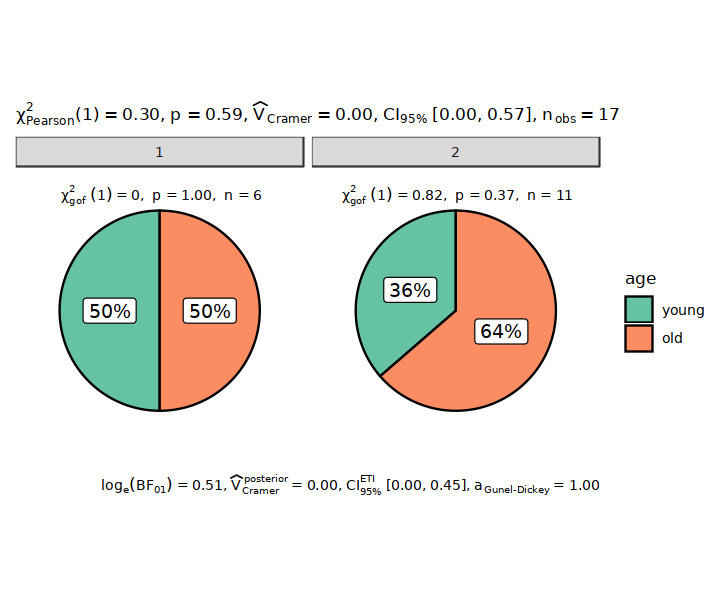

In [87]:
ggpiestats(diamonds2, age, group, palette = 'Set2')

In [88]:
ggsave('./figure/testset1.nmf.fig5.ratio.pdf',width = 6,height = 4)

### 比较不同亚组的细胞比例差异

In [ ]:
load('testset1.bys.rda')

group1$group = paste0('subtype',group1$group)

ano = group1 %>%  tibble::rownames_to_column(.,'sample')

all = left_join(ano,dataset,by = 'sample')

head(all,2)

my_comparisons = list(c('subtype1','subtype2'))

library(ggpubr)

In [101]:
options(repr.plot.height = 8.5,repr.plot.width = 8)

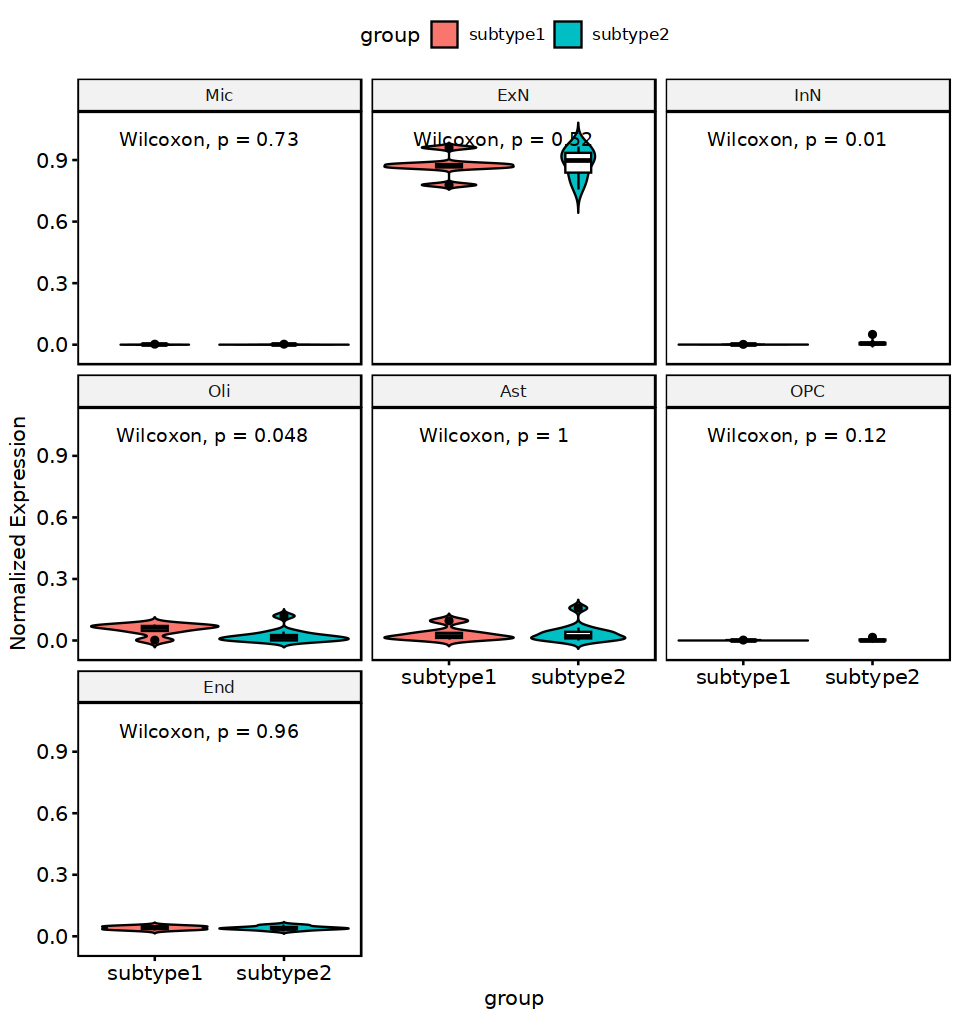

In [108]:
all %>% 
  #dplyr::filter(group %in% c("IBC","N","DCIS")) %>% 
  ggviolin(x = "group", y = c(colnames(all)[8:14]), fill = "group",
           combine = T,
         #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##
         ylab="Normalized Expression",
         add = "boxplot", add.params = list(fill = "white"))+
stat_compare_means()

In [111]:
save(ano,file = 'testset1.groups.rda')

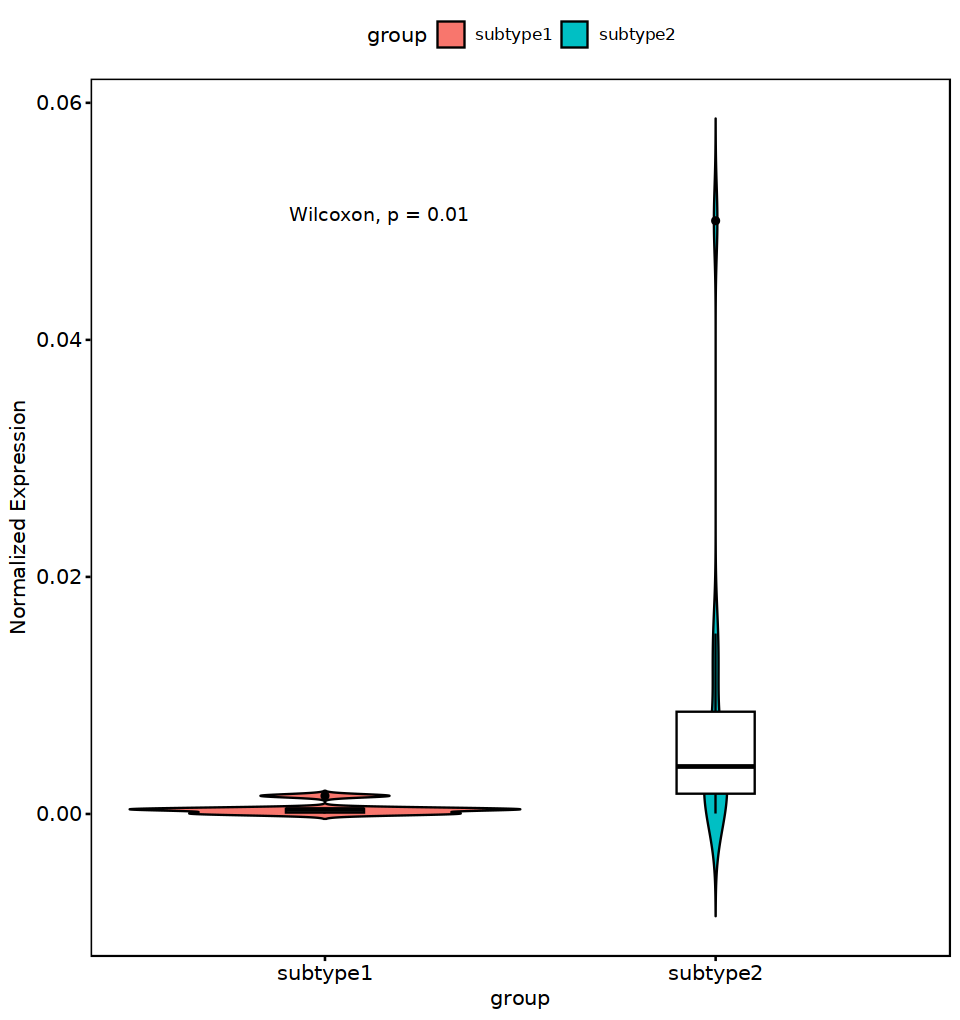

In [114]:
all %>% 
  #dplyr::filter(group %in% c("IBC","N","DCIS")) %>% 
  ggviolin(x = "group", y = 'InN', fill = "group",
           combine = T,
         #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##
         ylab="Normalized Expression",
         add = "boxplot", add.params = list(fill = "white"))+
stat_compare_means()

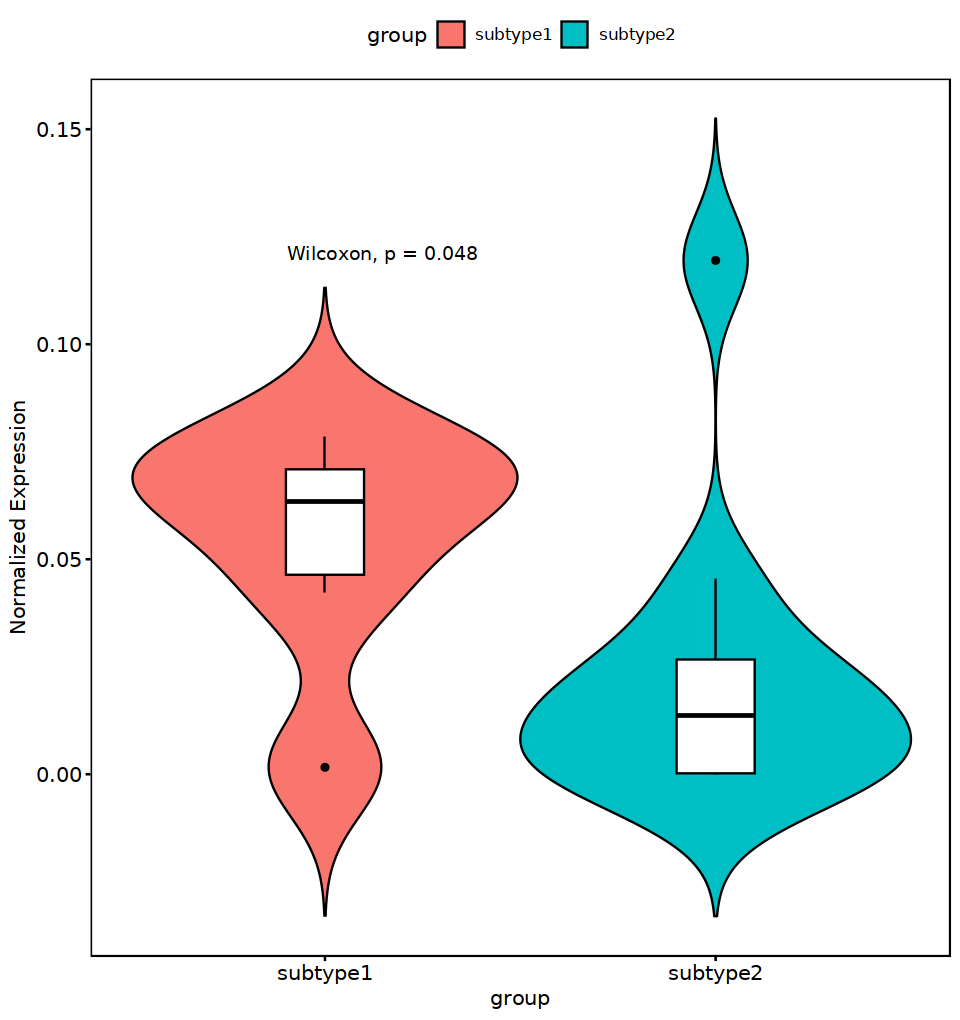

In [115]:
all %>% 
  #dplyr::filter(group %in% c("IBC","N","DCIS")) %>% 
  ggviolin(x = "group", y = 'Oli', fill = "group",
           combine = T,
         #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##
         ylab="Normalized Expression",
         add = "boxplot", add.params = list(fill = "white"))+
stat_compare_means()